In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import wb 

In [2]:
import itertools

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = [10,6]

In [5]:
np.random.seed(0)

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
'''defining time intervals'''
start_dt = dt.date(2000,1,1)
end___dt = dt.date(2017,12,31)

In [8]:
'''defining other universal parameters for data download'''
countries = ['US', 'GBR', 'ZAF', 'CHN', 'JPN']

indicators = {
    'money_supply': 'FM.LBL.BMNY.GD.ZS',
    'investments': 'BX.KLT.DINV.CD.WD',
    'XM': 'BN.CAB.XOKA.CD',
    'exchange_rate': 'DPANUSLCU',
    'lending_rate': 'FR.INR.LEND',
    'bond': 'DT.NFL.BOND.CD',
    'GDP': 'NY.GDP.PCAP.KD'
}

In [9]:
for i in countries:
    for key, value in enumerate(indicators.items()):
        globals()['{}_{}'.format(i, value[0])] = wb.download(country=i, indicator=value[1],start=start_dt,end=end___dt)[::-1]
        globals()['{}_{}'.format(i, value[0])].reset_index(level=0, drop=True, inplace=True)
        globals()['{}_{}'.format(i, value[0])].index = pd.to_numeric(arg=globals()['{}_{}'.format(i, value[0])].index, errors='ignore')

In [10]:
'''Concatnating various series into a single factor'''
money_supply = pd.concat((US_money_supply, CHN_money_supply, JPN_money_supply, GBR_money_supply, ZAF_money_supply), axis=1)
GDP = pd.concat((US_GDP, CHN_GDP, JPN_GDP, GBR_GDP, ZAF_GDP), axis=1)
XM = pd.concat((US_XM, CHN_XM, JPN_XM, GBR_XM, ZAF_XM), axis=1)
bonds= pd.concat((US_bond, CHN_bond, JPN_bond, GBR_bond, ZAF_bond), axis=1)
investments = pd.concat((US_investments, CHN_investments, JPN_investments, GBR_investments, ZAF_investments), axis=1)
lending_rate = pd.concat((US_lending_rate, CHN_lending_rate, JPN_lending_rate, GBR_lending_rate, ZAF_lending_rate), axis=1)

# Renaming columns
money_supply.columns = countries
GDP.columns = countries
XM.columns = countries
bonds.columns = countries
investments.columns = countries
lending_rate.columns = countries

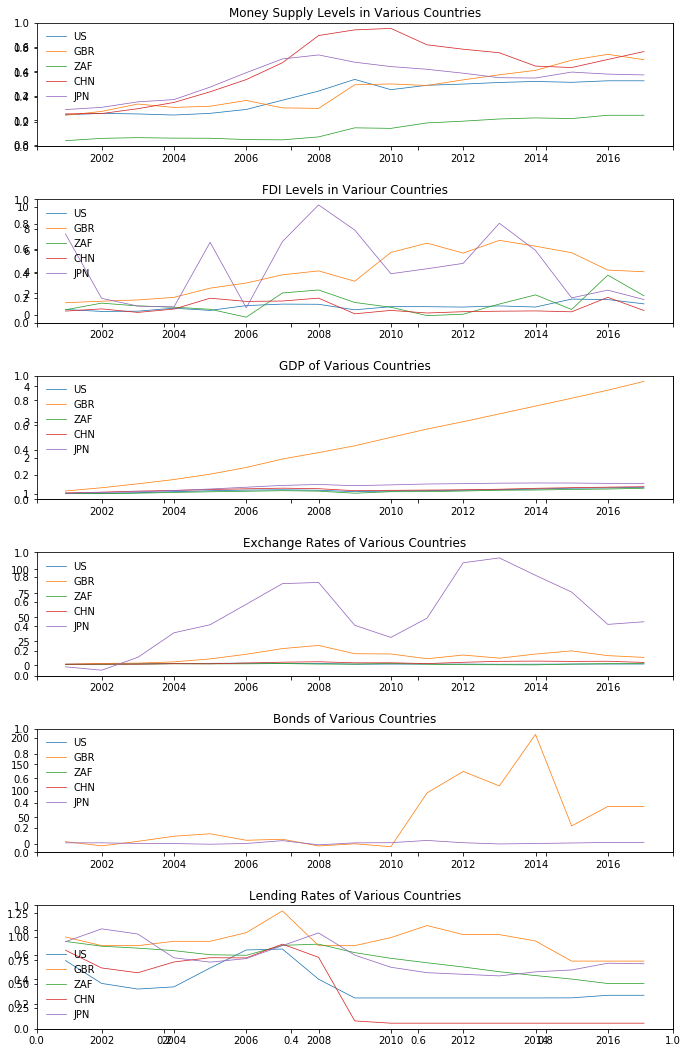

In [11]:
fig = plt.figure(figsize=(10,15))
fig.subplots(nrows=6, ncols=1, sharex=True)
ax1 = fig.add_subplot(6,1,1)
ax1.plot(money_supply.pct_change()[1:].add(1).cumprod(), linewidth=0.75);
ax1.legend(money_supply.columns, loc='best', frameon=False, title=None)
ax1.set_title('Money Supply Levels in Various Countries')
ax2 = fig.add_subplot(6,1,2)
ax2.plot(investments.pct_change()[1:].add(1).cumprod(), linewidth=0.75);
ax2.legend(investments.columns, loc='best', frameon=False, title=None)
ax2.set_title('FDI Levels in Variour Countries')
ax3 = fig.add_subplot(6,1,3)
ax3.plot(GDP.pct_change()[1:].add(1).cumprod(), linewidth=0.75);
ax3.legend(GDP.columns, loc='best', frameon=False, title=None)
ax3.set_title('GDP of Various Countries')
ax4 = fig.add_subplot(6,1,4)
ax4.plot(XM.pct_change()[1:].add(1).cumprod(), linewidth=0.75);
ax4.legend(XM.columns, loc='best', frameon=False, title=None)
ax4.set_title('Exchange Rates of Various Countries')
ax5 = fig.add_subplot(6,1,5)
ax5.plot(bonds.pct_change()[1:].add(1).cumprod(), linewidth=0.75);
ax5.legend(bonds.columns, loc='best', frameon=False, title=None)
ax5.set_title('Bonds of Various Countries')
ax6 = fig.add_subplot(6,1,6)
ax6.plot(lending_rate.pct_change()[1:].add(1).cumprod(), linewidth=0.75);
ax6.legend(lending_rate.columns, loc='best', frameon=False, title=None)
ax6.set_title('Lending Rates of Various Countries')
plt.tight_layout(True)
plt.show()

Generally, this type of analysis is based purely graphs, can be difficult as over short period of time may effects can be observed simulaneously and in subtle and complex ways. For this reason, macroeconomic models are interpreted often under citeris parabas assumption. It is for this reason that economists often evaluate thses models over long periods of time, controlling for the difference bwetween difference countries and shocks over time.